<a href="https://colab.research.google.com/github/sofial47/senalesysistemas/blob/main/cuaderno1parcialse%C3%B1alesysistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simulación del proceso de acondicionamiento y digitalización de una señal

En este ejercicio se simula el funcionamiento de un sistema de adquisición de datos que convierte una señal analógica continua en una señal digital. El proceso incluye:

- Acondicionamiento de la señal al rango del convertidor A/D (de -3.3 V a 5 V)
- Muestreo a una frecuencia suficientemente alta (fs = 10 Hz)
- Digitalización (cuantización) usando un convertidor de 8 bits

La señal a muestrear es:

\[
x(t) = 20\sin(7t - \frac{\pi}{2}) - 3\cos(5t) + 2\cos(10t)
\]


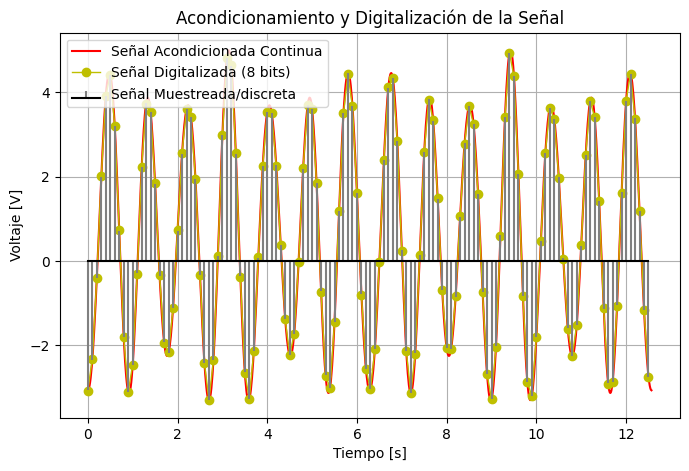

In [12]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros del convertidor A/D
bits = 8  # Resolución del ADC
niveles = 2 ** bits  # Número de niveles de cuantización (256)
V_min = -3.3  # Voltaje mínimo del convertidor
V_max = 5.0   # Voltaje máximo del convertidor

# Frecuencia fundamental (calculada como inversa de 2π)
f0 = 1 / (2 * np.pi)  # ~0.159 Hz
T0 = 1 / f0           # Periodo fundamental ≈ 2π

# Frecuencia de muestreo (mayor que 2*f_max para evitar aliasing)
fs = 10  # Hz
Ts = 1 / fs  # Periodo de muestreo

# Tiempo continuo para graficar 2 periodos completos
t_cont = np.linspace(0, 2 * T0, 1000)

# Señal analógica original (continua)
x_cont = (
    20 * np.sin(7 * t_cont - np.pi/2)  # Componente 1
    - 3 * np.cos(5 * t_cont)           # Componente 2
    + 2 * np.cos(10 * t_cont)          # Componente 3
)

# Escalamos la señal original al rango del convertidor [V_min, V_max]
x_min, x_max = np.min(x_cont), np.max(x_cont)
x_scaled_cont = (x_cont - x_min) / (x_max - x_min) * (V_max - V_min) + V_min

# Tiempo discreto para muestreo
t_disc = np.arange(0, 2 * T0, Ts)

# Muestreo: evaluamos la señal en los puntos discretos
x_disc = (
    20 * np.sin(7 * t_disc - np.pi/2)
    - 3 * np.cos(5 * t_disc)
    + 2 * np.cos(10 * t_disc)
)

# Escalamos la señal muestreada también al rango del convertidor
x_scaled_disc = (x_disc - x_min) / (x_max - x_min) * (V_max - V_min) + V_min

# Cuantización: se redondea a los niveles digitales del ADC
paso = (V_max - V_min) / (niveles - 1)  # Tamaño de paso
x_digital = np.round((x_scaled_disc - V_min) / paso) * paso + V_min

# Graficamos todo el proceso
plt.figure(figsize=(8, 5))

# Señal continua acondicionada
plt.plot(t_cont, x_scaled_cont, c='r', label='Señal Acondicionada Continua')

# Señal digitalizada (puntos redondeados)
plt.plot(t_disc, x_digital, c='y', marker='o', label='Señal Digitalizada (8 bits)', linewidth=1)

# Señal muestreada sin redondear (palitos grises)
plt.stem(t_disc, x_scaled_disc, label='Señal Muestreada/discreta', basefmt='k-', linefmt='grey', markerfmt=' ')

plt.title('Acondicionamiento y Digitalización de la Señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()
plt.show()




- La curva roja representa la **señal continua acondicionada**, que ha sido escalada al rango del convertidor [−3.3 V, 5 V].
- Los puntos amarillos representan la **señal digitalizada**, ya cuantizada con 8 bits de resolución.
- Las líneas verticales grises (tipo stem) indican la **señal muestreada** antes de ser cuantizada.

Como la frecuencia de muestreo (10 Hz) es mucho mayor al doble de la frecuencia máxima de la señal, se evita el aliasing y se garantiza una digitalización precisa. También se observa que la cuantización produce niveles escalonados según los valores permitidos por el ADC.


In [ ]:
#2
# Señal original continua: x(t) = 3*cos(2π*5500*t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t) 10*cos(2π*5500*t)
#f_original = 5500  # Hz (frecuencia peligrosa para aliasing)
#A = 10
#duracion = 0.002  # 2 ms para ver algunas oscilaciones

# Tiempo continuo (referencia)
#fs_ref = 200000  # muy alta para simular señal "real" continua
#t_cont = np.arange(0, duracion, 1/fs_ref)
#x_cont = A * np.cos(2 * np.pi * f_original * t_cont)

# Caso 1: Frecuencia de muestreo incorrecta (aliasing)
#fs_mala = 5000  # Hz < 2*fmax
#t_mala = np.arange(0, duracion, 1/fs_mala)
#x_mala = A * np.cos(2 * np.pi * f_original * t_mala)

# Caso 2: Frecuencia de muestreo adecuada (sin aliasing)
#fs_buena = 22000  # Hz > 2*fmax
#t_buena = np.arange(0, duracion, 1/fs_buena)
#x_buena = A * np.cos(2 * np.pi * f_original * t_buena)

# Graficar
#plt.figure(figsize=(8, 5))

# Señal original
#plt.plot(t_cont * 100, x_cont, label='Señal continua (referencia)', color='gray', linewidth=1)

# Señal muestreada mal (alias)
#plt.stem(t_mala * 100, x_mala, linefmt='r-', markerfmt='ro', basefmt=' ', label='Muestreo incorrecto (5 kHz)')

# Señal muestreada bien
#plt.stem(t_buena * 100, x_buena, linefmt='g-', markerfmt='go', basefmt=' ', label='Muestreo correcto (22 kHz)')

#plt.title('Comparación: Aliasing vs Muestreo correcto')
#plt.xlabel('Tiempo [ms]')
#plt.ylabel('x(t)')
#plt.grid(True)
#plt.legend()
#plt.tight_layout()
#plt.show()


en la selda de arriba solo estaba comparando la señal con las 2 frecuencias diferentes (para ver como quedaba) para tener una mejor visualizacion de como se diferencian

### Simulación de aliasing por una frecuencia de muestreo inadecuada

En esta simulación vamos a mostrar el efecto del **aliasing**, que ocurre cuando se muestrea una señal con una frecuencia **menor al doble de su frecuencia máxima**.

La señal analógica es:

\[
x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + 10 \cos(11000\pi t)
\]

Y usamos una frecuencia de muestreo:

\[
f_s = 5 \, \text{kHz}
\]

El componente de mayor frecuencia es \( f = \frac{11000\pi}{2\pi} = 5500 \, \text{Hz} \), por lo tanto el muestreo es insuficiente porque \( f_s < 2f_{\text{max}} = 11 \, \text{kHz} \).


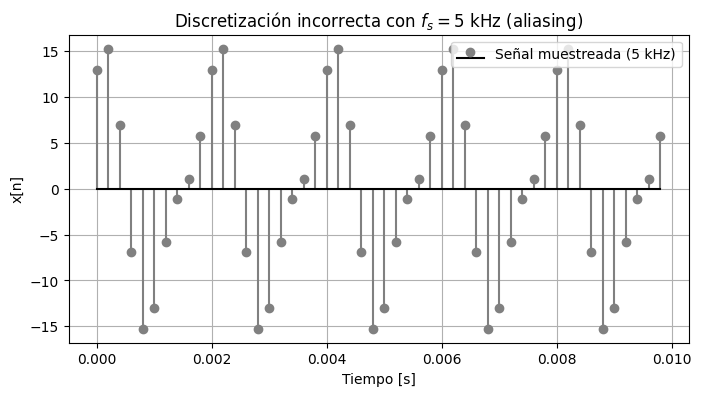

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia de muestreo NO adecuada (inferior al mínimo necesario)
fs = 5000  # [Hz]

# Creamos el vector de tiempo desde 0 hasta 10 milisegundos con paso 1/fs
t = np.arange(0, 0.01, 1/fs)

# Definimos la señal original evaluada en los puntos de muestreo:
# Componentes de diferentes frecuencias, una de ellas > fs/2 (provoca aliasing)
x = (
    3 * np.cos(1000 * np.pi * t) +      # f = 500 Hz
    5 * np.sin(2000 * np.pi * t) +      # f = 1000 Hz
    10 * np.cos(11000 * np.pi * t)      # f = 5500 Hz → mayor que fs/2 = 2500 Hz
)

# Graficamos la señal muestreada usando stem (discreta)
plt.figure(figsize=(8, 4))
plt.stem(t, x, linefmt='gray', markerfmt='o', basefmt='k-', label='Señal muestreada (5 kHz)')

# Títulos y etiquetas
plt.title('Discretización incorrecta con $f_s = 5$ kHz (aliasing)')
plt.xlabel('Tiempo [s]')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
plt.show()




En el gráfico se observa la **señal muestreada** a una frecuencia de 5 kHz. Debido a que uno de los componentes de la señal tiene 5500 Hz, que es **mayor que la mitad de la frecuencia de muestreo (fs/2 = 2500 Hz)**, se produce **aliasing**.

Esto provoca que:
- La componente de 5500 Hz no se represente correctamente.
- Aparezcan "formas" falsas o distorsionadas.
- Se pierda la fidelidad de la señal original.

Este ejemplo demuestra por qué **es necesario cumplir el Teorema de Nyquist**:  
\[
f_s \geq 2 f_{\text{máxima}}
\]


### Discretización adecuada de una señal mediante muestreo

A continuación se simula el muestreo correcto de una señal compuesta por tres componentes sinusoidales:

\[
x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + 10 \cos(11000\pi t)
\]

La componente de mayor frecuencia es:

\[
f_{\text{máx}} = \frac{11000\pi}{2\pi} = 5500 \, \text{Hz}
\]

Según el **Teorema de Nyquist**, la frecuencia de muestreo debe cumplir:

\[
f_s \geq 2 \cdot f_{\text{máx}} = 11000 \, \text{Hz}
\]

Por eso se elige una frecuencia de muestreo de:

\[
f_s = 17 \, \text{kHz}
\]

Con este muestreo, evitamos el **aliasing** y preservamos la fidelidad de la señal original.


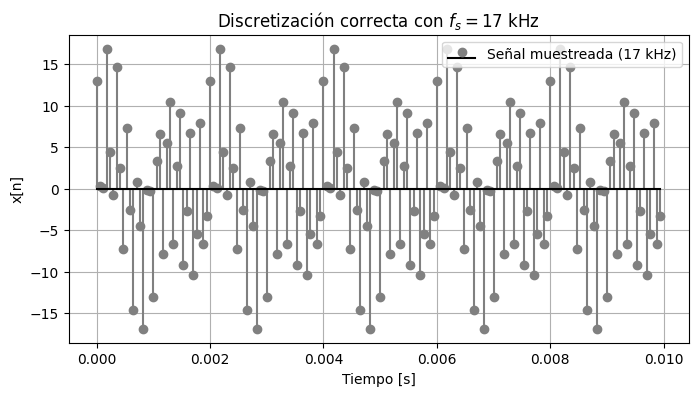

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia de muestreo adecuada (mayor al doble de la frecuencia máxima de la señal)
fs = 17000  # [Hz]

# Vector de tiempo desde 0 hasta 10 ms con paso de muestreo 1/fs
t = np.arange(0, 0.01, 1/fs)

# Definición de la señal continua evaluada en los puntos de muestreo
# Contiene tres frecuencias: 500 Hz, 1000 Hz y 5500 Hz
x = (
    3 * np.cos(1000 * np.pi * t) +     # f = 500 Hz
    5 * np.sin(2000 * np.pi * t) +     # f = 1000 Hz
    10 * np.cos(11000 * np.pi * t)     # f = 5500 Hz → fs/2 = 8500 > 5500 → OK
)

# Graficamos la señal discretizada usando puntos y líneas verticales
plt.figure(figsize=(8, 4))
plt.stem(t, x, linefmt='gray', markerfmt='o', basefmt='k-', label='Señal muestreada (17 kHz)')

# Títulos y etiquetas
plt.title('Discretización correcta con $f_s = 17$ kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('x[n]')
plt.grid(True)
plt.legend()
plt.show()




En este gráfico se observa la señal muestreada correctamente con una frecuencia de 17 kHz, que **cumple el criterio de Nyquist**.

- Todas las componentes de la señal (hasta 5500 Hz) quedan perfectamente representadas.
- No se observa aliasing.
- La señal digital conserva la forma original de la señal continua.

Esta simulación muestra cómo una frecuencia de muestreo **adecuada evita distorsiones** y permite una reconstrucción fiel de la señal original.


### Cálculo simbólico de la distancia entre señales en SymPy

En este bloque de código calculamos la **distancia cuadrática media** entre dos señales periódicas \( x_1(t) \) y \( x_2(t) \) usando **Python simbólico con `sympy`**.

Se define:
- \( x_1(t) = A \cos(\omega_0 t) \)
- \( x_2(t) \) como una señal cuadrada periódica definida por tramos

Se calcula la distancia media cuadrática:

\[
d(x_1, x_2) = \frac{1}{T} \int_0^T (x_1(t) - x_2(t))^2 dt
\]


In [8]:
#3
# Importamos la librería simbólica sympy
import sympy as sp

# Definimos las variables simbólicas: tiempo t, periodo T y amplitud A
t, T, A = sp.symbols('t T A', positive=True)

# Definimos la frecuencia fundamental ω₀ = 2π/T
w0 = 2 * sp.pi / T

# Definimos la señal x₁(t) = A cos(ω₀ t)
x1 = A * sp.cos(w0 * t)

# Definimos la señal x₂(t) como una señal cuadrada periódica por tramos
# 1 en el primer cuarto de periodo
# -1 en el segundo y tercer cuarto
# 1 en el último cuarto
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t <= T))
)

# Calculamos la diferencia al cuadrado: (x₁(t) - x₂(t))²
diff_squared = (x1 - x2)**2

# Calculamos la distancia media cuadrática como la integral sobre un periodo
d_expr = (1/T) * sp.integrate(diff_squared, (t, 0, T))

# Simplificamos la expresión final
d_simplified = sp.simplify(d_expr)

# Mostramos el resultado simplificado en formato bonito
sp.pprint(d_simplified)


 2          
A    4⋅A    
── - ─── + 1
2     π     



El valor obtenido representa la distancia media cuadrática entre una señal **cosenoidal** y una señal **cuadrada por tramos** en el intervalo de un periodo \( [0, T] \). Este valor puede usarse, por ejemplo, para comparar la fidelidad entre una señal ideal y una aproximación por Fourier.

La distancia depende de \( A \) y \( T \), pero puede simplificarse más si se desea evaluar numéricamente (por ejemplo, usando \( A = 1 \), \( T = 2\pi \), etc.).



### Cálculo del espectro de Fourier

A continuación se calcula el coeficiente aₙ de la serie trigonométrica de Fourier para una señal trapezoidal par y periódica.
Como la señal es par, se espera que los términos seno sean cero (bₙ = 0). Se grafica la magnitud, fase y se evalúa la reconstrucción.


Tabla de coeficientes:


,n,a_n (parte real),b_n (parte imaginaria),|c_n| (magnitud),"∠c_n (fase, rad)"
0,-5,-0.016211,0.0,0.016211,3.141593
1,-4,-0.000000,0.0,0.000000,3.141593
2,-3,-0.045032,0.0,0.045032,3.141593
3,-2,0.202642,0.0,0.202642,0.000000
4,-1,-0.405285,0.0,0.405285,3.141593
5,0,0.000000,0.0,0.000000,0.000000
6,1,-0.405285,0.0,0.405285,3.141593
7,2,0.202642,0.0,0.202642,0.000000
8,3,-0.045032,0.0,0.045032,3.141593
9,4,-0.000000,0.0,0.000000,3.141593


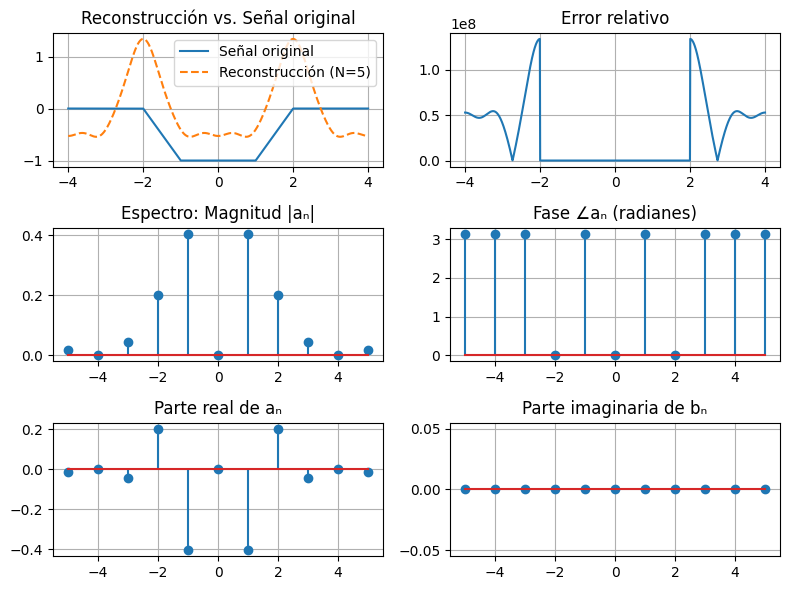

In [6]:
#4
# Importamos librerías necesarias
import numpy as np                # Librería para cálculos numéricos
import matplotlib.pyplot as plt  # Librería para graficar
import pandas as pd              # Librería para mostrar tabla de coeficientes

# Parámetros de la señal trapezoidal
A = 1         # Amplitud de la señal
d1 = 1        # Extremo del tramo plano (interior)
d2 = 2        # Extremo de las rampas (tramo inclinado)
T = 2 * d2    # Periodo de la señal: desde -d2 a d2
w0 = 2 * np.pi / T  # Frecuencia fundamental angular

# Definición de los coeficientes a_n (solo cosenos porque la señal es par)
def an(n):
    if n == 0:
        return 0  # No hay componente DC ya que la señal es impar respecto a y=-A
    factor = -4 * A / (T * (n * w0)**2 * (d2 - d1))  # Factor general
    # Coeficiente a_n usando la segunda derivada (impulsos)
    return factor * (np.cos(n * w0 * d1) - np.cos(n * w0 * d2))

# Definición de la señal original exacta por tramos (x(t))
def x_exact(t):
    t = np.array(t)
    x = np.zeros_like(t)
    m = A / (d2 - d1)  # Pendiente de las rampas
    # Tramo de rampa descendente (lado izquierdo)
    x += ((t > -d2) & (t < -d1)) * (-m * (t + d2))
    # Tramo plano inferior
    x += ((t >= -d1) & (t <= d1)) * (-A)
    # Tramo de rampa ascendente (lado derecho)
    x += ((t > d1) & (t < d2)) * (m * (t - d1) - A)
    return x

# Reconstrucción de la señal usando la serie de Fourier
N = 5  # Número de términos armónicos
t_vals = np.linspace(-T, T, 1000)  # Vector de tiempo para graficar dos periodos
x_recon = np.zeros_like(t_vals)    # Inicializamos la reconstrucción

# Sumamos los términos de la serie de Fourier
for n in range(-N, N + 1):
    a_n = an(abs(n)) if n != 0 else 0  # Como la señal es par, usamos |n|
    x_recon += a_n * np.cos(n * w0 * t_vals)

# Señal original evaluada en los mismos puntos
x_true = x_exact(t_vals)

# Cálculo del error relativo entre señal original y reconstruida
error = np.abs(x_recon - x_true)
relative_error = error / (np.abs(x_true) + 1e-8)  # Añadimos valor pequeño para evitar división por cero

# Construcción del espectro de Fourier
n_vals = np.arange(-N, N + 1)  # Valores de n (positivo y negativo)
a_vals = np.array([an(abs(n)) if n != 0 else 0 for n in n_vals])  # Coeficientes reales a_n
b_vals = np.zeros_like(a_vals)     # Coeficientes imaginarios (cero por simetría par)
mag_vals = np.abs(a_vals)          # Magnitud del espectro
phase_vals = np.angle(a_vals)      # Fase del espectro

# Creamos una tabla con los coeficientes para visualizar
df = pd.DataFrame({
    'n': n_vals,
    'a_n (parte real)': a_vals,
    'b_n (parte imaginaria)': b_vals,
    '|c_n| (magnitud)': mag_vals,
    '∠c_n (fase, rad)': phase_vals
})
print("Tabla de coeficientes:")
display(df)  # Mostramos la tabla en Colab

# Generación de gráficos
plt.figure(figsize=(8, 6))

# Reconstrucción vs señal original
plt.subplot(3, 2, 1)
plt.plot(t_vals, x_true, label="Señal original")
plt.plot(t_vals, x_recon, '--', label="Reconstrucción (N=5)")
plt.title("Reconstrucción vs. Señal original")
plt.legend()
plt.grid(True)

# Gráfico del error relativo
plt.subplot(3, 2, 2)
plt.plot(t_vals, relative_error)
plt.title("Error relativo")
plt.grid(True)

# Espectro de magnitud
plt.subplot(3, 2, 3)
plt.stem(n_vals, mag_vals)
plt.title("Espectro: Magnitud |aₙ|")
plt.grid(True)

# Fase del espectro
plt.subplot(3, 2, 4)
plt.stem(n_vals, phase_vals)
plt.title("Fase ∠aₙ (radianes)")
plt.grid(True)

# Parte real
plt.subplot(3, 2, 5)
plt.stem(n_vals, a_vals)
plt.title("Parte real de aₙ")
plt.grid(True)

# Parte imaginaria (debería ser cero)
plt.subplot(3, 2, 6)
plt.stem(n_vals, b_vals)
plt.title("Parte imaginaria de bₙ")
plt.grid(True)

plt.tight_layout()
plt.show()


Se observa que la señal reconstruida con N = 5 armónicos se aproxima bien a la señal original excepto en los bordes, donde aparece el efecto Gibbs. El error relativo es bajo en las zonas planas y más alto en los puntos de cambio abrupto.
